In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
reg = 2.5e-4
model = keras.models.Sequential([
    keras.layers.Conv2D(64, [3, 3], padding='same', kernel_regularizer=keras.regularizers.l2(l=reg), activation='relu', input_shape=[32, 32, 3]),
    keras.layers.Conv2D(64, [3, 3], padding='same', kernel_regularizer=keras.regularizers.l2(l=reg), activation='relu'),
    keras.layers.MaxPool2D([2, 2]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, [3, 3], padding='same', kernel_regularizer=keras.regularizers.l2(l=reg), activation='relu'),
    keras.layers.Conv2D(128, [3, 3], padding='same', kernel_regularizer=keras.regularizers.l2(l=reg), activation='relu'),
    keras.layers.MaxPool2D([2, 2]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.l2(l=reg)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [17]:
his = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_data=[x_test, y_test], verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 13s - loss: 2.2593 - acc: 0.4343 - val_loss: 1.8384 - val_acc: 0.5042
Epoch 2/20
 - 11s - loss: 1.4602 - acc: 0.6221 - val_loss: 1.5873 - val_acc: 0.5814
Epoch 3/20
 - 11s - loss: 1.2605 - acc: 0.6940 - val_loss: 1.2756 - val_acc: 0.7039
Epoch 4/20
 - 11s - loss: 1.1367 - acc: 0.7360 - val_loss: 1.3205 - val_acc: 0.6973
Epoch 5/20
 - 11s - loss: 1.0643 - acc: 0.7661 - val_loss: 1.2008 - val_acc: 0.7171
Epoch 6/20
 - 11s - loss: 1.0123 - acc: 0.7849 - val_loss: 1.1047 - val_acc: 0.7610
Epoch 7/20
 - 11s - loss: 0.9773 - acc: 0.8057 - val_loss: 1.1052 - val_acc: 0.7716
Epoch 8/20
 - 11s - loss: 0.9491 - acc: 0.8184 - val_loss: 1.1177 - val_acc: 0.7748
Epoch 9/20
 - 11s - loss: 0.9363 - acc: 0.8324 - val_loss: 1.2199 - val_acc: 0.7659
Epoch 10/20
 - 11s - loss: 0.9234 - acc: 0.8436 - val_loss: 1.1729 - val_acc: 0.7823
Epoch 11/20
 - 11s - loss: 0.9252 - acc: 0.8528 - val_loss: 1.1470 - val_acc: 0.7908
Epoch 12/20
 - 11s - los

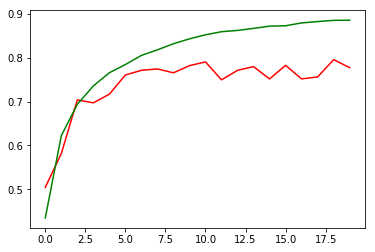

In [18]:
plt.plot(his.history['val_acc'], 'r')
plt.plot(his.history['acc'], 'g')

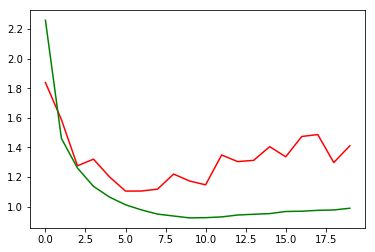

In [19]:
plt.plot(his.history['val_loss'], 'r')
plt.plot(his.history['loss'], 'g')